# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

## CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## 1. Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Business Objective: Keeping foccus on the question "What do consumers value in a car?", identify the factors (e.g. specific car characteristics) that impact car prices and sales. Identify the most meaningful factors in order to enable used car dealers make better decisions around inventory, setting prices, and other key decisions for their business.

To restate, the goal is to convert the raw data to actionable insights about the used car market.

## 2. Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### 2.1 Import Data

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
raw = pd.read_csv('data/vehicles.csv')
print(raw.head())
print(raw.info())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

### 2.2 Summary of Raw Data:

Raw data contains 426880 rows and 18 columns of data, representing 426880 vehicles with data about the vehicle like manufacturer, model, information about the engine and car (size, color, etc.), state that the vehicle is sold in, and most importantly, the price of that vehicle. The **price** is what we want to get a better understanding of (the target variable).

### 2.3 Data Issues and Initial Processing
Initial look at the data shows NaNs in many columns. In the first few rows, we only have ID, region, state, and price. This is not a lot of information to go off of. Lets get a better idea of the NaNs in the data, then decide how to handle them and otherwise clean the data.

In [48]:
raw[['manufacturer']].value_counts(dropna = False)

manufacturer   
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
NaN                17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun   

In [49]:
raw[['state']].value_counts(dropna = False)

state
ca       50614
fl       28511
tx       22945
ny       19386
oh       17696
or       17104
mi       16900
nc       15277
wa       13861
pa       13753
wi       11398
co       11088
tn       11066
va       10732
il       10387
nj        9742
id        8961
az        8679
ia        8632
ma        8174
mn        7716
ga        7003
ok        6792
sc        6327
mt        6294
ks        6209
in        5704
ct        5188
al        4955
md        4778
nm        4425
mo        4293
ky        4149
ar        4038
ak        3474
la        3196
nv        3194
nh        2981
dc        2970
me        2966
hi        2964
vt        2513
ri        2320
sd        1302
ut        1150
wv        1052
ne        1036
ms        1016
de         949
wy         610
nd         410
Name: count, dtype: int64

In [50]:
raw[['condition']].value_counts(dropna = False)

condition
NaN          174104
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: count, dtype: int64

In [51]:
raw[['VIN']].value_counts(dropna = False)

VIN              
NaN                  161042
1FMJU1JT1HEA52352       261
3C6JR6DT3KG560649       235
1FTER1EH1LLA36301       231
5TFTX4CN3EX042751       227
                      ...  
2C4RC1GG5HR528898         1
2C4RC1GG5ER171119         1
2C4RC1GG4LR115301         1
2C4RC1GG4JR212365         1
3C6TRVBG4GE133590         1
Name: count, Length: 118247, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

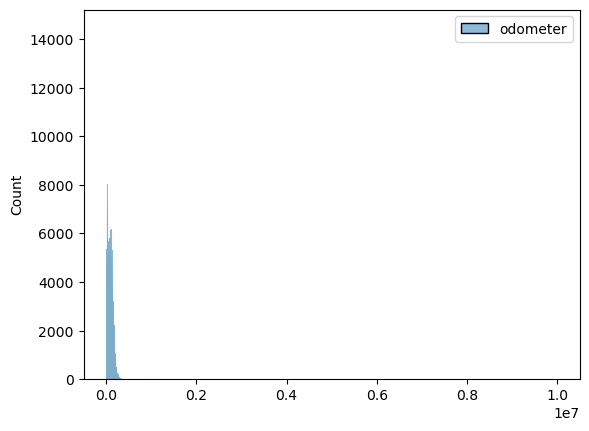

In [52]:
sns.histplot(raw[['odometer']])

In [53]:
print(raw[raw['odometer']<9999999].sort_values('odometer', ascending = False).head())

                id         region  price    year manufacturer     model  \
269845  7316504855  hudson valley   6000  2006.0          NaN     E 250   
23566   7302602633    bakersfield   2800  1998.0          gmc     yukon   
265677  7302640462         albany   1750  2002.0       subaru  forester   
279259  7309774586      rochester   1900  1984.0    chevrolet  stepside   
275504  7316389178  new york city   1300  1950.0      pontiac       NaN   

       condition    cylinders fuel   odometer title_status transmission  VIN  \
269845      good  8 cylinders  gas  9876543.0        clean    automatic  NaN   
23566       fair  8 cylinders  gas  9750924.0        clean    automatic  NaN   
265677      good  4 cylinders  gas  9099999.0        clean    automatic  NaN   
279259      fair  8 cylinders  gas  9000000.0        clean    automatic  NaN   
275504       NaN          NaN  gas  9000000.0        clean       manual  NaN   

       drive       size    type paint_color state  
269845   rwd  fu

Text(0.5, 1.0, 'Count of Rows in Each Odometer Category')

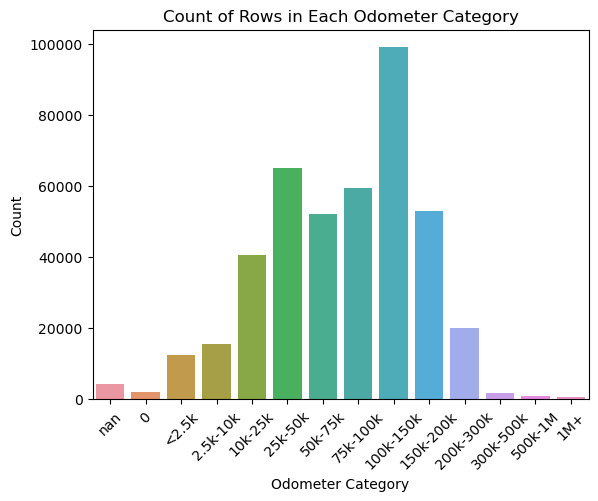

In [54]:
bins = [-0.1, 0, 2500, 10000, 25000, 50000, 75000, 100000, 150000, 200000, 300000, 500000, 1e6, float('inf')]
labels = ['0','<2.5k', '2.5k-10k', '10k-25k', '25k-50k', '50k-75k','75k-100k', '100k-150k','150k-200k', '200k-300k', '300k-500k', '500k-1M', '1M+']
raw['tmp_odometer_cat'] = pd.cut(raw['odometer'], bins=bins, labels=labels)
raw['tmp_odometer_cat'] = raw['tmp_odometer_cat'].astype(str)

## Histogram:
category_order = ['nan'] + labels
sns.countplot(data=raw, x='tmp_odometer_cat', order = category_order)
plt.xticks(rotation=45)
plt.xlabel('Odometer Category')
plt.ylabel('Count')
plt.title('Count of Rows in Each Odometer Category')

          year
410858  2022.0
270191  2022.0
165048  2022.0
405000  2022.0
94611   2022.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='Count'>

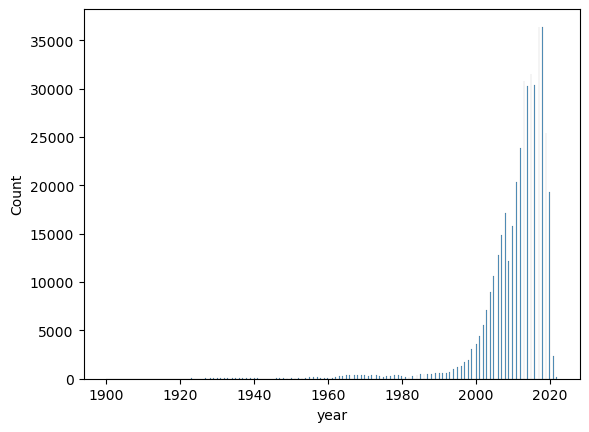

In [55]:
print(raw[['year']].sort_values('year', ascending =False).head())
sns.histplot(raw, x = 'year')

In [56]:
raw[['region','state']].value_counts(dropna=False)
raw[['state']].value_counts(dropna=False)

state
ca       50614
fl       28511
tx       22945
ny       19386
oh       17696
or       17104
mi       16900
nc       15277
wa       13861
pa       13753
wi       11398
co       11088
tn       11066
va       10732
il       10387
nj        9742
id        8961
az        8679
ia        8632
ma        8174
mn        7716
ga        7003
ok        6792
sc        6327
mt        6294
ks        6209
in        5704
ct        5188
al        4955
md        4778
nm        4425
mo        4293
ky        4149
ar        4038
ak        3474
la        3196
nv        3194
nh        2981
dc        2970
me        2966
hi        2964
vt        2513
ri        2320
sd        1302
ut        1150
wv        1052
ne        1036
ms        1016
de         949
wy         610
nd         410
Name: count, dtype: int64

In [88]:
raw['type'].value_counts(dropna=False)

type
NaN            92858
sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: count, dtype: int64

In [76]:
print(raw[['manufacturer','model']].value_counts(dropna=False)[1:40])

manufacturer  model           
chevrolet     silverado 1500      5140
ram           1500                4069
toyota        camry               3133
chevrolet     silverado           3021
honda         accord              2968
jeep          wrangler            2848
honda         civic               2799
nissan        altima              2779
ford          escape              2745
toyota        tacoma              2582
ford          explorer            2499
jeep          grand cherokee      2489
ram           2500                2413
toyota        corolla             2241
ford          mustang             2220
              fusion              1979
chevrolet     equinox             1972
honda         cr-v                1930
ford          focus               1828
chevrolet     malibu              1764
              tahoe               1726
dodge         charger             1714
toyota        rav4                1701
chevrolet     corvette            1701
hyundai       sonata             

In [83]:
unique_models = raw[['manufacturer','model']].drop_duplicates()

# Save the unique combinations to a CSV file
unique_models.to_csv('unique_models.csv', index=False)

In [84]:
vehicle_type_map = pd.read_csv('final_classified_vehicle_types.csv') # courtesy ChatGPT
print(vehicle_type_map.head(5))

   manufacturer                         model vehicle_type
0           NaN                           NaN      unknown
1           gmc      sierra 1500 crew cab slt        truck
2     chevrolet                silverado 1500        truck
3     chevrolet           silverado 1500 crew        truck
4        toyota          tundra double cab sr        truck
5          ford                     f-150 xlt        truck
6           gmc   sierra 2500 hd extended cab        truck
7     chevrolet         silverado 1500 double        truck
8        toyota                        tacoma        truck
9     chevrolet         colorado extended cab        truck
10    chevrolet          corvette grand sport        sport
11         jeep                      cherokee          SUV
12         jeep      wrangler unlimited sport          SUV
13    chevrolet        silverado 1500 regular        truck
14    chevrolet         colorado crew cab z71        truck
15       toyota      tacoma access cab pickup        tru

In [58]:
# Assuming 'df' is your pandas DataFrame
nan_counts = raw.isna().sum()

nan_percentage = (raw.isna().sum() / len(raw)) * 100

# Display the percentage
print(nan_percentage)

id                   0.000000
region               0.000000
price                0.000000
year                 0.282281
manufacturer         4.133714
model                1.236179
condition           40.785232
cylinders           41.622470
fuel                 0.705819
odometer             1.030735
title_status         1.930753
transmission         0.598763
VIN                 37.725356
drive               30.586347
size                71.767476
type                21.752717
paint_color         30.501078
state                0.000000
tmp_odometer_cat     0.000000
dtype: float64


In [59]:
# Count the number of NaN values in each row
nan_counts_per_row = raw.isna().sum(axis=1)

# Aggregate the counts
nan_counts_agg = nan_counts_per_row.value_counts().sort_index()

# Display the aggregated counts
print("Number of NaN values per row:")
print(nan_counts_agg)

Number of NaN values per row:
0     34868
1     78259
2     99854
3     91251
4     46728
5     21196
6     19246
7     30443
8      4279
9       125
10      539
11       24
14       68
Name: count, dtype: int64


In [157]:
manufacturer_groups_dict = {
    'USA': ['ford','chevrolet','dodge','cadillac','buick','tesla','harley-davidson','saturn','mercury','pontiac','lincoln','jeep','ram','chrysler','gmc'],
    'Japan': ['toyota','honda','nissan','subaru','lexus','acura','mazda','infiniti','datsun','mitsubishi'],
    'Korea': ['hyundai','kia'],
    'Germany': ['bmw','mercedes-benz','volkswagen','audi','porsche','mini'],
    'Italy': ['fiat','alfa-romeo','ferrari'],
    'Britain': ['jaguar','aston-martin','land rover','morgan','rover'],
    'Sweden': ['volvo']
}
tmp_data = [(country, manufacturer) for country, manufacturers in manufacturer_groups_dict.items() for manufacturer in manufacturers]
manufacturer_groups = pd.DataFrame(tmp_data, columns = ['country','manufacturer'])
print(manufacturer_groups.head(20))

   country     manufacturer
0      USA             ford
1      USA        chevrolet
2      USA            dodge
3      USA         cadillac
4      USA            buick
5      USA            tesla
6      USA  harley-davidson
7      USA           saturn
8      USA          mercury
9      USA          pontiac
10     USA          lincoln
11     USA             jeep
12     USA              ram
13     USA         chrysler
14     USA              gmc
15   Japan           toyota
16   Japan            honda
17   Japan           nissan
18   Japan           subaru
19   Japan            lexus


Some clean-up notes:
- Could consider removing rows where all we know is the ID and location of sale, since there isn't enough information on the vehicle to detect any patterns (e.g. if they are new trucks in Florida and salvage sedans in Illinois, then we may be misleading by comparing sales prices).
- VIN is just an additional ID number and is probably not important to this analysis. "Has a known VIN" might be important as this is a way to track the history of the vehicle, so that could *potentially* be valuable, but will be dismissed for this analysis. Drop VIN column.
- Condition column should be ordered as followed (if needing to order it): ['salvage','fair','good','excellent','like new','new']. Note that there are many NaNs in this column.
- Odometer: There are some crazy high odomoters (1e7 or 10M miles). A quick google search suggests that the highest miles ever traveled in a personal car was a bit over 3M miles. I worry that 10M or 9999999 are data entry/quality issues rather than correct odometers, so I am going to set those to NaN. Then when I process that column, I suggest making a categorical variable or applying a log transform to the remainder of the odometer values.
- state: consider creating broader region category for grouping similar, low-count states (e.g. dc/va/md, nd/sd, etc.)
- year: ok as is. Beware that it uses float type because int can't handle NaN
- size: ['sub-compact','compact','mid-size','full-size']  # dropping b/c its redundant with type and there is a ton of missing data
- type: many, including "other" and NaN
- drive: ['4wd','rwd','fwd'] and NaN
- title_status: ['clean','rebuilt','salvage','lien','missing','parts only'] and NaN
- transmission: ['automatic','other','manual'] and NaN
- region: I think this is going to be a tough one (too many, likely inconsistent in labeling), so recommend drop this column. A different suggestion would be to keep the top 10 or N region-state combos and then keep only state code for the others. This would preserve the "region" information for regions in which we have substantial datapoints. Final decision: drop the column.
- paint_color: many, including NaN. Drop due to data size issues.
- model: theoretically important to this exercise, but there are some serious data quality issues. Plus doing One Hot Encoding on this column explodes the number of columns. DROP this column.
- price: there are some unusual prices... like $0, $1... or excessively high prices. Lets limit to cars in the $1k to $250k range

In [214]:
# Initialize "cleaned" dataframe. Drop unneeded columns:
cols_to_drop = ['region','VIN','model', 'paint_color','size']
cleaned = pd.merge(raw,vehicle_type_map, on=['manufacturer','model'], how='left').drop(cols_to_drop, axis=1)

# Update odometer:
# Very few odometer is missing so I think we delete all missing odometer since I'm counting on this to be an important variable
cleaned.loc[cleaned['odometer'] > 1e6, 'odometer'] = np.nan
cleaned = cleaned.dropna(subset = ['odometer'])

# Remove rows where we don't know anything about the characteristics of the car
characteristics = ['year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type']
rows_to_delete = cleaned[cleaned[characteristics].isna().all(axis=1)]
print("Number of rows to be deleted for lack of chars info:", len(rows_to_delete))
cleaned.dropna(subset=characteristics, how='all', inplace=True)

# Remove rows with nonsensical or outlier prices:
price_condition1 = cleaned['price'] > 1000
price_condition2 = cleaned['price'] < 250e3
cleaned = cleaned[price_condition1 & price_condition2]

# Updated Type using ChatGPT's help mapping manufacturer and model to type
cleaned['type_updt'] = cleaned['type'].fillna(cleaned['vehicle_type'])
cleaned = cleaned.drop(['type','vehicle_type'], axis=1)

# Convert manufacturer (too granular) to country of origin of manufacturer (e.g. USA, Japan, )
cleaned = pd.merge(cleaned, manufacturer_groups, on = ['manufacturer'], how = 'left').drop('manufacturer', axis=1)

# Year: drop (not too many, and this is an important feature)
cleaned.dropna(subset='year', how='all', inplace=True)

print(cleaned.shape)

Number of rows to be deleted for lack of chars info: 0
(375685, 14)


In [215]:
# Assuming 'df' is your pandas DataFrame
nan_counts = cleaned.isna().sum()

nan_percentage = (cleaned.isna().sum() / len(cleaned)) * 100

# Display the percentage
print(nan_percentage)

id                   0.000000
price                0.000000
year                 0.000000
condition           37.527450
cylinders           40.823828
fuel                 0.565633
odometer             0.000000
title_status         1.609327
transmission         0.403263
drive               30.269508
state                0.000000
tmp_odometer_cat     0.000000
type_updt            0.000000
country              3.636291
dtype: float64


## 3. Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler

In [208]:
cleaned.columns

Index(['id', 'price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'state', 'tmp_odometer_cat',
       'type_updt', 'country'],
      dtype='object')

In [310]:
# One-Hot Encoding:
ohe_cols = ['country', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'type_updt']

# Logarithm:
log_transform_cols = ['odometer']
other_cols = ['year']

In [311]:
# # Pipeline for one-hot encoding
# ohe_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Pipeline for log transformation
# from sklearn.base import TransformerMixin

# class LogTransformer(TransformerMixin):
#     def __init__(self):
#         pass
    
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X_copy = X.copy()
#         # Apply log transformation, handling zeros and NaNs
#         X_copy['odometer'] = np.log1p(X_copy['odometer'])
#         return X_copy

# # log_pipeline = Pipeline([
# #     ('log_transform', FunctionTransformer(np.log1p, validate=True))  # note: np.log1p handles zero vals
# # ])
# log_pipeline = Pipeline([
#     ('log_transform', LogTransformer())
# ])

# # Combine the pipelines using ColumnTransformer
# col_transformer = ColumnTransformer([
#     ('ohe', ohe_pipeline, ohe_cols),
#     ('log', log_pipeline, log_transform_cols)
# ])

# # Final pipeline
# pipeline = Pipeline([
#     ('col_transformer', col_transformer)#,
#     # ('scaler', StandardScaler())  # Optional: Scale the features
# ])

# # Fit and transform the data
# transformed_data = pipeline.fit_transform(cleaned)

In [312]:
# # Get the names of the columns after transformation
# transformed_columns = (
#     ohe_cols 
#     + ['odometer_log']  # assuming 'odometer' is the column you transformed
# )
# # Create a new DataFrame with the transformed data
# transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)
# transformed_df.head()

In [313]:
# print(ohe_pipeline.named_steps['onehot'].get_feature_names_out())


In [314]:
# Apply one-hot encoding
imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

ohe_data = imputer.fit_transform(cleaned[ohe_cols])
ohe_columns = ohe_encoder.fit_transform(ohe_data).toarray()
ohe_column_names = ohe_encoder.get_feature_names_out(ohe_cols)

# # Apply log transformation
# log_data = np.log1p(cleaned[log_transform_cols])

# # Concatenate the transformed data
# transformed_data = np.concatenate([ohe_columns, log_data], axis=1)
# transformed_columns = list(ohe_column_names) + log_transform_cols

# # Create DataFrame with transformed data
# transformed_df = pd.DataFrame(transformed_data, columns=transformed_columns)

X = pd.DataFrame(ohe_columns, columns = ohe_column_names, index = cleaned.index)
X['odometer'] = cleaned['odometer']
X['year'] = cleaned['year']

# Now you have a new pandas DataFrame with the transformations applied
#X = StandardScaler().fit_transform(X)
print(X.head())

   country_Britain  country_Germany  country_Italy  country_Japan  \
0              0.0              0.0            0.0            0.0   
1              0.0              0.0            0.0            0.0   
2              0.0              0.0            0.0            0.0   
3              0.0              0.0            0.0            1.0   
4              0.0              0.0            0.0            0.0   

   country_Korea  country_Sweden  country_USA  country_missing  \
0            0.0             0.0          1.0              0.0   
1            0.0             0.0          1.0              0.0   
2            0.0             0.0          1.0              0.0   
3            0.0             0.0          0.0              0.0   
4            0.0             0.0          1.0              0.0   

   condition_excellent  condition_fair  ...  type_updt_pickup  \
0                  0.0             0.0  ...               1.0   
1                  0.0             0.0  ...               

In [315]:
X['odometer_log1p'] = np.log1p(X['odometer'])
X[X['odometer_log1p'].isnull()].head()
X = X.drop('odometer', axis=1)

In [316]:
# y = cleaned['price']
# X = cleaned.drop(['price'], axis=1)
# poly_ohe = make_column_transformer((OneHotEncoder(drop = 'if_binary', sparse_output = False), ohe_cols),
#                                        remainder='passthrough')
# poly_ohe.fit_transform(X.copy())

In [317]:
cleaned['odometer']

0          57923.0
1          71229.0
2          19160.0
3          41124.0
4         128000.0
            ...   
376785     32226.0
376786     12029.0
376787      4174.0
376788     30112.0
376789     22716.0
Name: odometer, Length: 375685, dtype: float64

In [318]:
cleaned.columns

Index(['id', 'price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'state', 'tmp_odometer_cat',
       'type_updt', 'country'],
      dtype='object')

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [319]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector, RFE

In [320]:
y = cleaned['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)
print(X_train.shape)

(281763, 62)


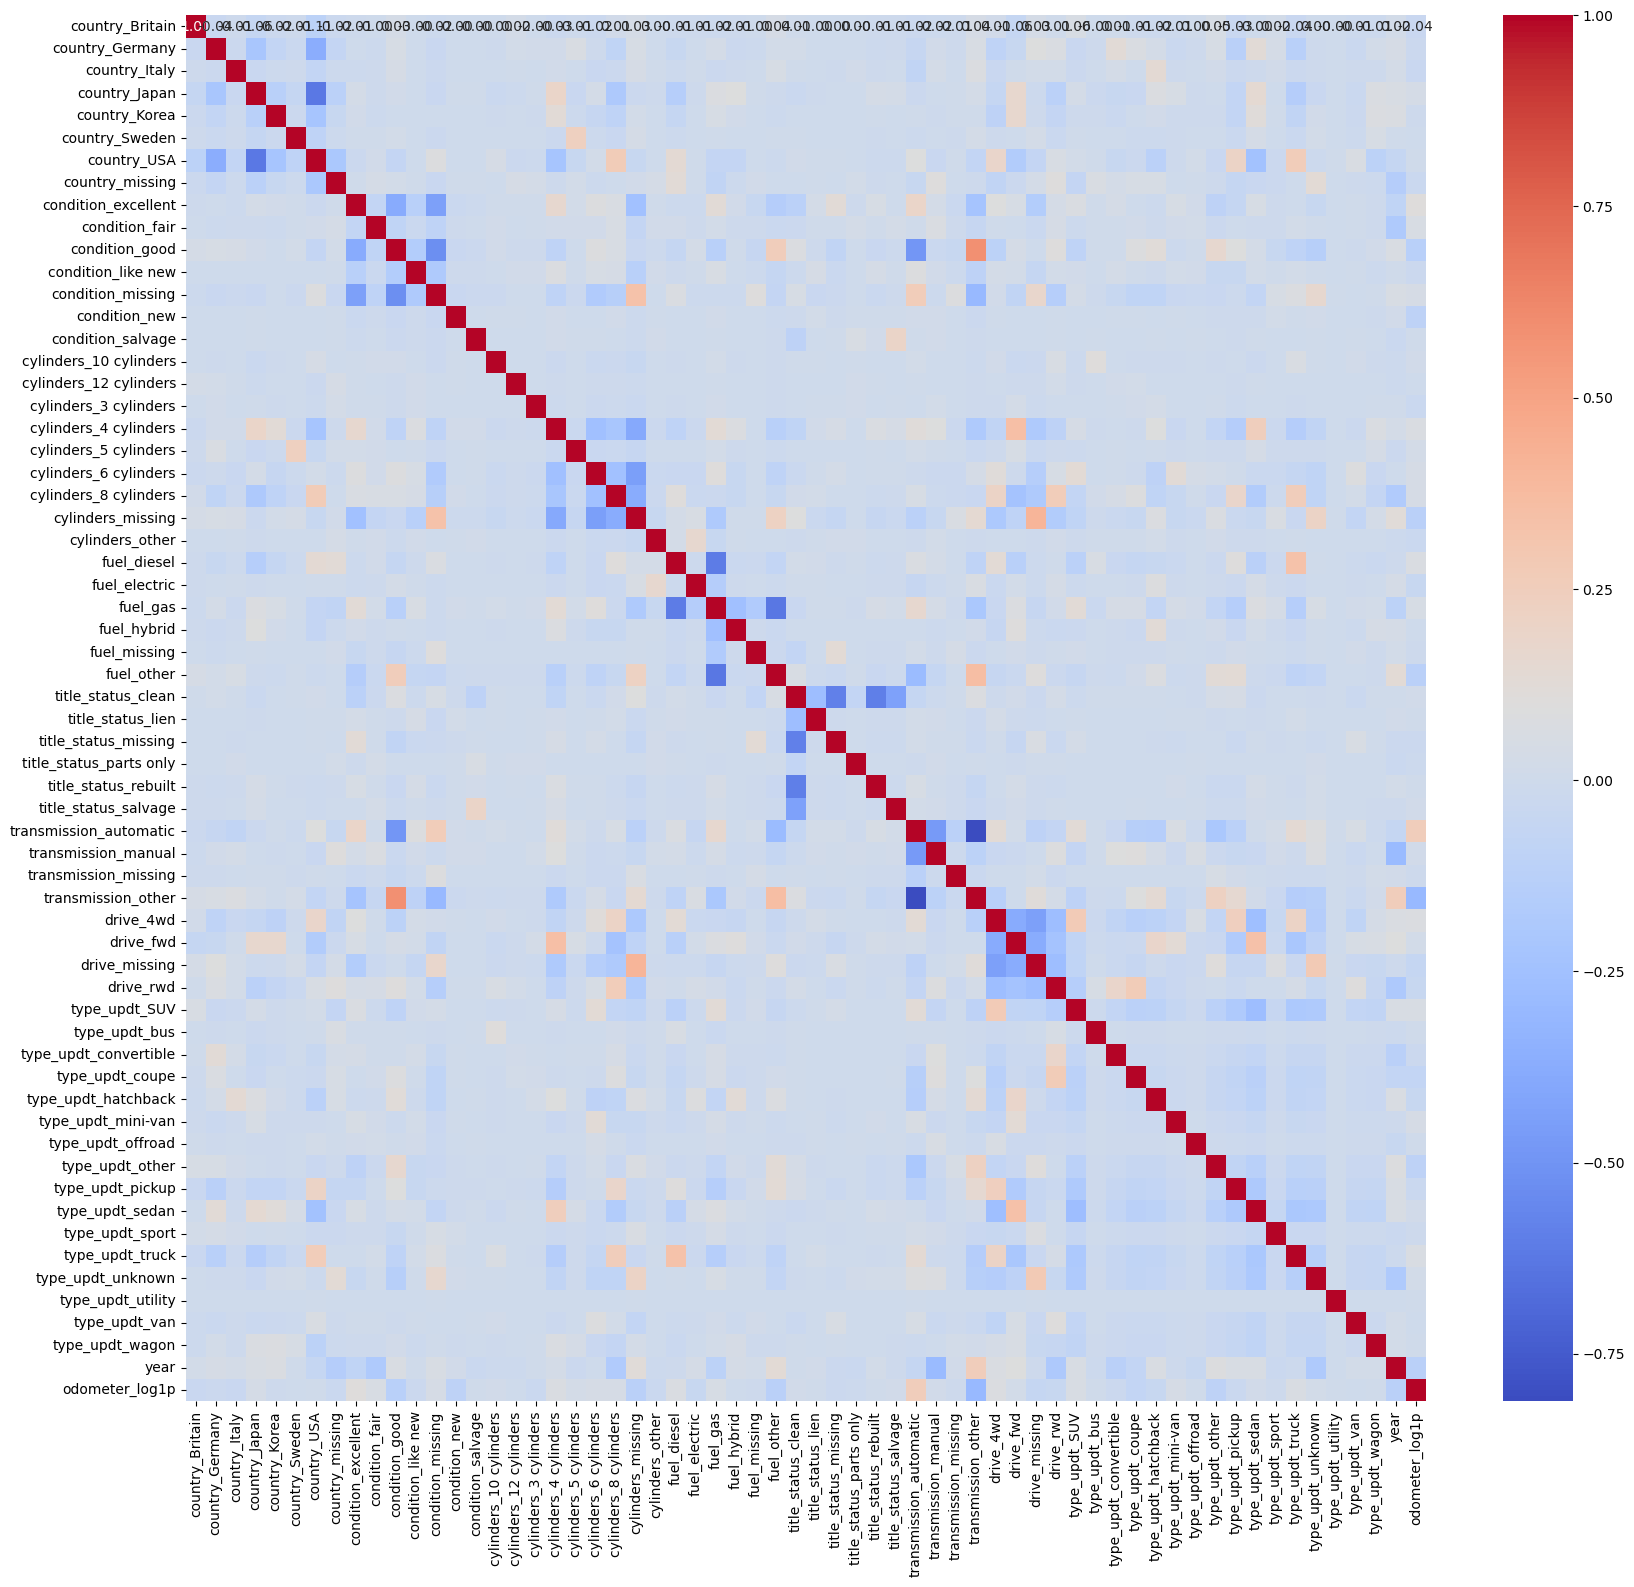

In [321]:
# Correlation matrix heatmap
corr_matrix = X_train.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### Simple Linear Regression

In [322]:
pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('linreg',LinearRegression())
])
pipe.fit(X_train,y_train)

linreg_train_mse = mean_squared_error(y_train, pipe.predict(X_train))
linreg_test_mse = mean_squared_error(y_test, pipe.predict(X_test))

print('LinReg Train MSE: ',linreg_train_mse)
print('LinReg Test MSE:  ',linreg_test_mse)

print(X_train.columns)
print(pipe.named_steps['linreg'].coef_)

linreg_coefs_df = pd.DataFrame(
    {'feature':X_train.columns,
    'coef':pipe.named_steps['linreg'].coef_}
).sort_values('coef', key = abs, ascending = False)
print(linreg_coefs_df)

LinReg Train MSE:  117030790.94631463
LinReg Test MSE:   114054112.95092826
Index(['country_Britain', 'country_Germany', 'country_Italy', 'country_Japan',
       'country_Korea', 'country_Sweden', 'country_USA', 'country_missing',
       'condition_excellent', 'condition_fair', 'condition_good',
       'condition_like new', 'condition_missing', 'condition_new',
       'condition_salvage', 'cylinders_10 cylinders', 'cylinders_12 cylinders',
       'cylinders_3 cylinders', 'cylinders_4 cylinders',
       'cylinders_5 cylinders', 'cylinders_6 cylinders',
       'cylinders_8 cylinders', 'cylinders_missing', 'cylinders_other',
       'fuel_diesel', 'fuel_electric', 'fuel_gas', 'fuel_hybrid',
       'fuel_missing', 'fuel_other', 'title_status_clean', 'title_status_lien',
       'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage',
       'transmission_automatic', 'transmission_manual', 'transmission_missing',
       'transmission_other', 'd

In [323]:
X_scaled = pd.DataFrame(pipe.named_steps['scaler'].transform(X_train), columns=X_train.columns)
print(X_scaled.describe().T)  # Summary statistics to understand scaling effects

                      count          mean       std        min       25%  \
country_Britain    281763.0 -6.034606e-17  1.000002  -0.100978 -0.100978   
country_Germany    281763.0  1.815678e-17  1.000002  -0.354150 -0.354150   
country_Italy      281763.0 -2.241857e-17  1.000002  -0.067129 -0.067129   
country_Japan      281763.0  2.254466e-17  1.000002  -0.602307 -0.602307   
country_Korea      281763.0 -6.622180e-17  1.000002  -0.211406 -0.211406   
...                     ...           ...       ...        ...       ...   
type_updt_utility  281763.0  2.862214e-18  1.000002  -0.004984 -0.004984   
type_updt_van      281763.0 -8.460553e-18  1.000002  -0.144693 -0.144693   
type_updt_wagon    281763.0 -6.243914e-17  1.000002  -0.162340 -0.162340   
year               281763.0  9.410960e-15  1.000002 -11.629844 -0.315423   
odometer_log1p     281763.0 -2.545933e-15  1.000002  -7.368349 -0.286177   

                        50%       75%         max  
country_Britain   -0.100978 -0.1009

### Ridge Regression, with Grid Search for optimal Alpha Hyperparameter

In [324]:
ridge_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('ridge', Ridge())
])
ridge_param_dict = {'ridge__alpha': np.logspace(0,10,25)}
ridge_grid = GridSearchCV(estimator = ridge_pipe,
                          param_grid = ridge_param_dict)
ridge_grid.fit(X_train, y_train)

best_ridge = ridge_grid.best_estimator_
best_ridge.fit(X_train,y_train)

ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train))
ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))

print('Ridge Train MSE: ',ridge_train_mse)
print('Ridge Test MSE:  ',ridge_test_mse)

Ridge Train MSE:  117027643.29054455
Ridge Test MSE:   114036881.1151677


In [326]:
ridge_coefs_df = pd.DataFrame(
    {'feature':X_train.columns,
    'coef':best_ridge.named_steps['ridge'].coef_}
).sort_values('coef', key = abs, ascending = False)
print(ridge_coefs_df[:20])
print(ridge_coefs_df[-10:])

                   feature         coef
60                    year  4502.608097
61          odometer_log1p -4294.954785
24             fuel_diesel  2178.748566
26                fuel_gas -1406.487471
40               drive_4wd  1394.286068
55         type_updt_truck  1269.092594
21   cylinders_8 cylinders  1203.384759
41               drive_fwd -1188.588927
18   cylinders_4 cylinders -1142.072572
52        type_updt_pickup  1134.313999
12       condition_missing  1102.667307
53         type_updt_sedan -1080.321342
39      transmission_other  1048.945794
36  transmission_automatic  -963.517178
9           condition_fair  -896.017590
48     type_updt_hatchback  -829.662669
10          condition_good  -810.464623
47         type_updt_coupe   740.041100
51         type_updt_other   717.232340
56       type_updt_unknown  -675.153748
                  feature       coef
25          fuel_electric  91.974178
23        cylinders_other -78.035496
20  cylinders_6 cylinders  73.964124
50      type

In [260]:
best_ridge.named_steps['ridge']

Ridge(alpha=316.22776601683796)

### Sequential Feature Selection with Lasso

In [236]:
sfs_lasso_pipe = Pipeline([
    ('selector', SequentialFeatureSelector(estimator = Lasso(), n_features_to_select = 5)),
    ('model', LinearRegression())
]).fit(X_train, y_train)

cols_from_sfs_lasso = X_train.columns[sfs_lasso_pipe.named_steps['selector'].get_support()]
print(cols_from_sfs_lasso)

lasso_train_mse = mean_squared_error(y_train, sfs_lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, sfs_lasso_pipe.predict(X_test))

print('SFS Lasso Train MSE: ',round(lasso_train_mse,3))
print('SFS Lasso Test MSE:  ',round(lasso_test_mse,3))

Index(['cylinders_8 cylinders', 'fuel_diesel', 'drive_fwd', 'year',
       'odometer_log1p'],
      dtype='object')
SFS Lasso Train MSE:  138159395.008
SFS Lasso Test MSE:  135328348.259


I'm going to try one more thing: normalizing the Price by the type of car. I think this will help.

In [274]:
## Cleaned 2: Retain paint_color, eventually split by vehicle type and then do Ridge Regression. 
# Initialize "cleaned" dataframe. Drop unneeded columns:
cols_to_drop = ['region','VIN','model','size','title_status','state','tmp_odometer_cat','cylinders']
cleaned2 = pd.merge(raw,vehicle_type_map, on=['manufacturer','model'], how='left').drop(cols_to_drop, axis=1)

# Update odometer:
# Very few odometer is missing so I think we delete all missing odometer since I'm counting on this to be an important variable
cleaned2.loc[cleaned2['odometer'] > 1e6, 'odometer'] = np.nan
cleaned2 = cleaned2.dropna(subset = ['odometer'])

# Remove rows where we don't know anything about the characteristics of the car
characteristics = ['year', 'manufacturer', 'condition',
       'fuel', 'odometer', 'transmission',
                   'paint_color',
       'drive', 'type']
# Calculate NaN count in specified columns
cleaned2['nan_count'] = cleaned2[characteristics].isna().sum(axis=1)
# Number of rows before dropping
initial_rows = len(cleaned2)
# Drop rows where the NaN count is greater than N
N = 2
cleaned2 = cleaned2[cleaned2['nan_count'] <= N]
# Remove the 'nan_count' column
cleaned2.drop(columns='nan_count', inplace=True)
# Number of rows after dropping
final_rows = len(cleaned2)
# Report the number of rows deleted
print("Number of rows deleted for lack of chars info:", initial_rows - final_rows)

# Remove rows with nonsensical or outlier prices:
price_condition1 = cleaned2['price'] > 1000
price_condition2 = cleaned2['price'] < 250e3
cleaned2 = cleaned2[price_condition1 & price_condition2]

# Updated Type using ChatGPT's help mapping manufacturer and model to type
cleaned2['type_updt'] = cleaned2['type'].fillna(cleaned2['vehicle_type'])
cleaned2 = cleaned2.drop(['type','vehicle_type'], axis=1)

vehicle_type_groups_dict = {
    'small': ['sedan','coupe','hatchback'],
    'large/family': ['mini-van','van','wagon'],
    'sporty': ['convertible','sport'],
    'large/utility': ['SUV','pickup','truck','offroad'],
    'bus': ['bus'],
    'other': ['other','unknown']
}
# Converting dictionary to list of tuples
vehicle_type_list = [(group, vtype) for group, types in vehicle_type_groups_dict.items() for vtype in types]
# Creating DataFrame
vehicle_types_df = pd.DataFrame(vehicle_type_list, columns=['vehicle_group', 'type_updt'])
cleaned2 = pd.merge(cleaned2, vehicle_types_df, on = ['type_updt'], how = 'left')

# Convert manufacturer (too granular) to country of origin of manufacturer (e.g. USA, Japan, )
cleaned2 = pd.merge(cleaned2, manufacturer_groups, on = ['manufacturer'], how = 'left').drop('manufacturer', axis=1)

# Year: drop (not too many, and this is an important feature)
cleaned2.dropna(subset='year', how='all', inplace=True)

print(cleaned2.shape)

Number of rows deleted for lack of chars info: 71725
(315611, 12)


In [275]:
## Percent NaN by column
nan_counts = cleaned2.isna().sum()
nan_percentage = (cleaned2.isna().sum() / len(cleaned2)) * 100
print(nan_percentage)

id                0.000000
price             0.000000
year              0.000000
condition        28.475560
fuel              0.307024
odometer          0.000000
transmission      0.176483
drive            19.261369
paint_color      16.480097
type_updt         0.000000
vehicle_group     0.000000
country           2.805986
dtype: float64


In [306]:
cleaned2.value_counts(['fuel','vehicle_group','type_updt'])

fuel      vehicle_group  type_updt
gas       small          sedan        68149
          large/utility  SUV          64029
                         pickup       27251
                         truck        25048
          small          coupe        15446
                                      ...  
hybrid    large/family   mini-van         5
          sporty         sport            4
electric  large/utility  pickup           3
          bus            bus              1
          large/family   van              1
Name: count, Length: 69, dtype: int64

In [298]:
top_coefs_df = pd.DataFrame()
for vehicle_type in cleaned2['vehicle_group'].unique():
    print('processing ',vehicle_type)
    cleaned2_subset = cleaned2[cleaned2['vehicle_group'] == vehicle_type].drop('vehicle_group',axis=1)
    y = cleaned2_subset['price']
    X = cleaned2_subset.drop('price',axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)
    print(X_train.shape)
    
    ohe_cols = ['country', 'condition','paint_color',
           'fuel', 'transmission',
           'drive', 'type_updt']
    poly_cols = ['year','odometer']
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('encoder', OneHotEncoder(drop='if_binary',sparse=False), ohe_cols),
            ('transformer', PolynomialFeatures(degree=2, include_bias=False), poly_cols),
        ],
        remainder='passthrough'
    )
    
    ridge_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('scaler',StandardScaler()),
        ('ridge', Ridge())
    ])
    ridge_param_dict = {'ridge__alpha': np.logspace(0,10,10)}
    ridge_grid = GridSearchCV(estimator = ridge_pipe,
                              param_grid = ridge_param_dict)
    ridge_grid.fit(X_train, y_train)
    
    best_ridge = ridge_grid.best_estimator_
    best_ridge.fit(X_train,y_train)
    
    ridge_train_mse = mean_squared_error(y_train, best_ridge.predict(X_train))
    ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test))
    
    # print('Ridge Train MSE: ',ridge_train_mse)
    # print('Ridge Test MSE:  ',ridge_test_mse)

    # print(X_train.columns)
    # print(best_ridge.named_steps['ridge'].coef_)
    feature_names = best_ridge.named_steps['preprocessor'].get_feature_names_out()
    feature_coefs = best_ridge.named_steps['ridge'].coef_
    
    ridge_coefs_df = pd.DataFrame(
        {'feature':feature_names,
        'coef':feature_coefs}
    ).sort_values('coef', key = abs, ascending = False)
    ridge_coefs_df['vehicle_group'] = vehicle_type
    # print(ridge_coefs_df)
    top_coefs_df = pd.concat([top_coefs_df,ridge_coefs_df], ignore_index = True)
print(top_coefs_df)

processing  large/utility
(108428, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

processing  other
(23841, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

processing  small
(81852, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

processing  large/family
(15962, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1

processing  bus
(315, 10)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  F

ValueError: Found unknown categories ['orange'] in column 2 during transform

In [293]:
print(top_coefs_df)

                          feature           coef  vehicle_group
0             transformer__year^3  250061.740728  large/utility
1               transformer__year -244289.819383  large/utility
2    transformer__year^2 odometer  -96436.818855  large/utility
3           transformer__odometer   90873.193770  large/utility
4    transformer__year odometer^2   42043.850036  large/utility
..                            ...            ...            ...
214     encoder__transmission_nan     -25.787826   large/family
215    encoder__paint_color_green      19.485476   large/family
216        encoder__country_Italy     -10.036629   large/family
217   encoder__paint_color_custom      -6.142029   large/family
218        encoder__fuel_electric      -5.568633   large/family

[219 rows x 3 columns]


In [303]:
for group in top_coefs_df['vehicle_group'].unique():
    print(group)
    df_subset = top_coefs_df[top_coefs_df['vehicle_group']==group].sort_values('coef', key=abs, ascending = False)
    print(df_subset.head())
    mask = df_subset['feature'].str.startswith('transformer')
    df_subset = df_subset[~mask]
    print(df_subset.head())

large/utility
                      feature           coef  vehicle_group
0         transformer__year^2  337964.843971  large/utility
1           transformer__year -332213.151684  large/utility
2  transformer__year odometer  -83558.349700  large/utility
3       transformer__odometer   75839.597580  large/utility
4     transformer__odometer^2    3120.829982  large/utility
                    feature         coef  vehicle_group
5      encoder__fuel_diesel  2833.516758  large/utility
6    encoder__type_updt_SUV -1967.250305  large/utility
7         encoder__fuel_gas -1954.776255  large/utility
8  encoder__type_updt_truck  1332.801651  large/utility
9        encoder__drive_4wd  1253.519547  large/utility
other
                       feature           coef vehicle_group
52         transformer__year^2  130295.773341         other
53           transformer__year -127294.116519         other
54  transformer__year odometer  -15164.310048         other
55     transformer__odometer^2    5268.06451

In [ ]:
for col in ['condition','type_updt','country','transmission']:
    

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Some takeaways:

Best model: Ridge Regression with Alpha = 316

Features: 'year', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'state', 'tmp_odometer_cat', 'type_updt', 'country'

Top Features:
- year
- odometer (negative)

Other top features:
- Diesel
- Gas (negative)

When I broke up the vehicles into broad categories (small, large/family, large/utility, sporty, bus):
- Within the large/utility category, Trucks correlated with higher prices, SUVs with lower prices
- Within the large/family category, Vans had a large positive coefficient (correlated with higher prices); wagons, and Korean-made car brands, had notably large negative coeffs.
- Within small cars, coupes sell well while hatchbacks do not
- Generally, FWD had large negative coeffs



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Feel free to use this data, but really you need to figure out the relationship between the price YOU can acquire the car at and what you can sell it for, and how long it takes to sell. Are you capital constrained? Are you constrained by lot space? What types of cars are most popular in your specific area?

Keeping all that in mind, here are some items to be aware of.
- This data confirms the expected hypothesis that newer cars (as indicated by Year) and cars with fewer miles (odometer) will sell at higher prices
- All other things equal, diesel outsells gas. Pickups and trucks outsell sedans.
- Within the large/utility category, Trucks correlated with higher prices, SUVs with lower prices
- Within the large/family category, Vans had a large positive coefficient (correlated with higher prices); wagons, and Korean-made car brands, had notably large negative coeffs.
- Within small cars, coupes sell well while hatchbacks do not
- Generally, FWD had large negative coeffs